In [1]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


In [2]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [3]:
## TODO: Specify a CNN architecture

def create_model():
    model = Sequential()
    model.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu', input_shape = X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(y_train.shape[1], ))
    return model


In [4]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint
## TODO: Compile the model

optimizers = {'SGD':SGD(), 
              'RMSprop':RMSprop(), 
              'Adagrad':Adagrad(), 
              'Adadelta':Adadelta, 
              'Adam':Adam, 
              'Adamax':Adamax, 
              'Nadam':Nadam,
             }

batch_size = 32
epochs = 120
hist = {}
for optimizer in optimizers.keys():
    model = create_model()
    print("Training model using "+ optimizer)
    model.compile(optimizer, 'mean_squared_error', metrics = ['mse'])
    filepath = "saved_models/optimizer_selection/model_" + optimizer +".h5"
    checkpointer = ModelCheckpoint(filepath = filepath, verbose = 1, save_best_only = True)
    hist[optimizer] = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Training model using Nadam
Train on 1712 samples, validate on 428 samples
Epoch 1/120
1712/1712 [==============================] - 3s - loss: 0.3711 - mean_squared_error: 0.3711 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 2/120
1712/1712 [==============================] - 1s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 3/120
1712/1712 [==============================] - 1s - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/120
1712/1712 [==============================] - 1s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5/120
1712/1712 [==============================] - 1s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 6/120
1712/1712 [==============================] - 1s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0077 - val_mean_squared_erro

1712/1712 [==============================] - 1s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 54/120
1712/1712 [==============================] - 1s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 55/120
1712/1712 [==============================] - 1s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 56/120
1712/1712 [==============================] - 1s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 57/120
1712/1712 [==============================] - 1s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 58/120
1712/1712 [==============================] - 1s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 59/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 109/120
1712/1712 [==============================] - 1s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 110/120
1712/1712 [==============================] - 1s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 111/120
1712/1712 [==============================] - 1s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 112/120
1712/1712 [==============================] - 1s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 113/120
1712/1712 [==============================] - 1s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 114/120
1712/1712 [==============================] - 1s - lo

1712/1712 [==============================] - 1s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 40/120
1712/1712 [==============================] - 1s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 41/120
1712/1712 [==============================] - 1s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 42/120
1712/1712 [==============================] - 1s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 43/120
1712/1712 [==============================] - 1s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 44/120
1712/1712 [==============================] - 1s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 45/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 94/120
1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 95/120
1712/1712 [==============================] - 1s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 96/120
1712/1712 [==============================] - 1s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 97/120
1712/1712 [==============================] - 1s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 98/120
1712/1712 [==============================] - 1s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 99/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 24/120
1712/1712 [==============================] - 1s - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 25/120
1712/1712 [==============================] - 1s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 26/120
1712/1712 [==============================] - 1s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 27/120
1712/1712 [==============================] - 1s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 28/120
1712/1712 [==============================] - 1s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 29/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 68/120
1712/1712 [==============================] - 1s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 69/120
1712/1712 [==============================] - 1s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 70/120
1712/1712 [==============================] - 1s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 71/120
1712/1712 [==============================] - 1s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 72/120
1712/1712 [==============================] - 1s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 73/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 113/120
1712/1712 [==============================] - 1s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 114/120
1712/1712 [==============================] - 1s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 115/120
1712/1712 [==============================] - 1s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 116/120
1712/1712 [==============================] - 1s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 117/120
1712/1712 [==============================] - 1s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 118/120
1712/1712 [==============================] - 1s - lo

1712/1712 [==============================] - 1s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 41/120
1712/1712 [==============================] - 1s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 42/120
1712/1712 [==============================] - 1s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 43/120
1712/1712 [==============================] - 1s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 44/120
1712/1712 [==============================] - 1s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 45/120
1712/1712 [==============================] - 1s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 46/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 94/120
1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 95/120
1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 96/120
1712/1712 [==============================] - 1s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 97/120
1712/1712 [==============================] - 1s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 98/120
1712/1712 [==============================] - 1s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 99/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 24/120
1712/1712 [==============================] - 1s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 25/120
1712/1712 [==============================] - 1s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 26/120
1712/1712 [==============================] - 1s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 27/120
1712/1712 [==============================] - 1s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 28/120
1712/1712 [==============================] - 1s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 29/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 76/120
1712/1712 [==============================] - 1s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 77/120
1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 78/120
1712/1712 [==============================] - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 79/120
1712/1712 [==============================] - 1s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 80/120
1712/1712 [==============================] - 1s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 81/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 8/120
1712/1712 [==============================] - 1s - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 9/120
1712/1712 [==============================] - 1s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 10/120
1712/1712 [==============================] - 1s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 11/120
1712/1712 [==============================] - 1s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 12/120
1712/1712 [==============================] - 1s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 13/120
1712/1712 [==============================] - 1s - loss: 0.01

1712/1712 [==============================] - 1s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 63/120
1712/1712 [==============================] - 1s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 64/120
1712/1712 [==============================] - 1s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 65/120
1712/1712 [==============================] - 1s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0619 - val_mean_squared_error: 0.0619
Epoch 66/120
1712/1712 [==============================] - 1s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 67/120
1712/1712 [==============================] - 1s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 68/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 118/120
1712/1712 [==============================] - 1s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 119/120
1712/1712 [==============================] - 1s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 120/120
1712/1712 [==============================] - 1s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Training model using Adadelta
Train on 1712 samples, validate on 428 samples
Epoch 1/120
1712/1712 [==============================] - 3s - loss: 0.5857 - mean_squared_error: 0.5857 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 2/120
1712/1712 [==============================] - 1s - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.0637 - val_mean_squared_error: 

1712/1712 [==============================] - 1s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 50/120
1712/1712 [==============================] - 1s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 51/120
1712/1712 [==============================] - 1s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 52/120
1712/1712 [==============================] - 1s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 53/120
1712/1712 [==============================] - 1s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 54/120
1712/1712 [==============================] - 1s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 55/120
1712/1712 [==============================] - 1s - loss: 0.

1712/1712 [==============================] - 1s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 105/120
1712/1712 [==============================] - 1s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 106/120
1712/1712 [==============================] - 1s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 107/120
1712/1712 [==============================] - 1s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 108/120
1712/1712 [==============================] - 1s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 109/120
1712/1712 [==============================] - 1s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 110/120
1712/1712 [==============================] - 1s - lo

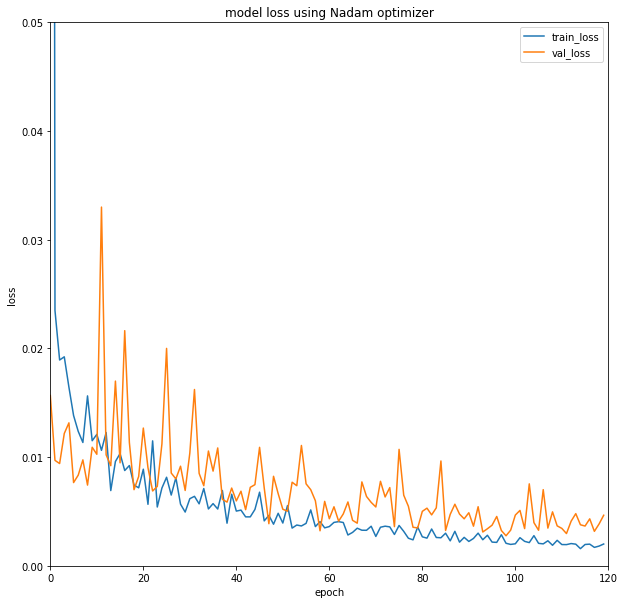

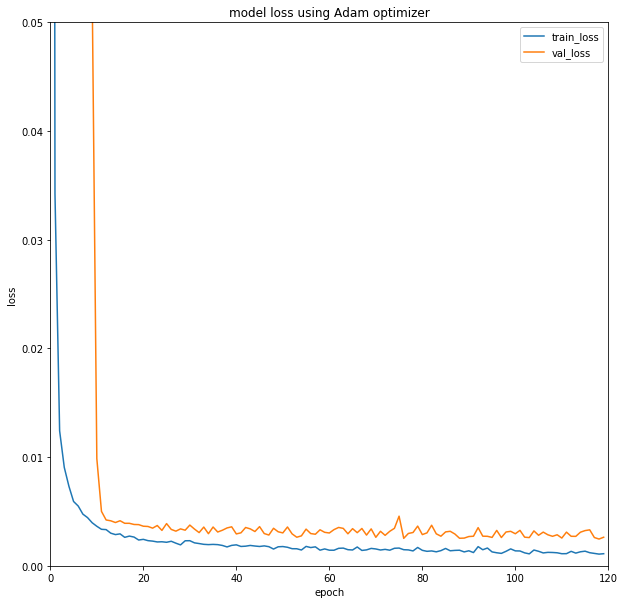

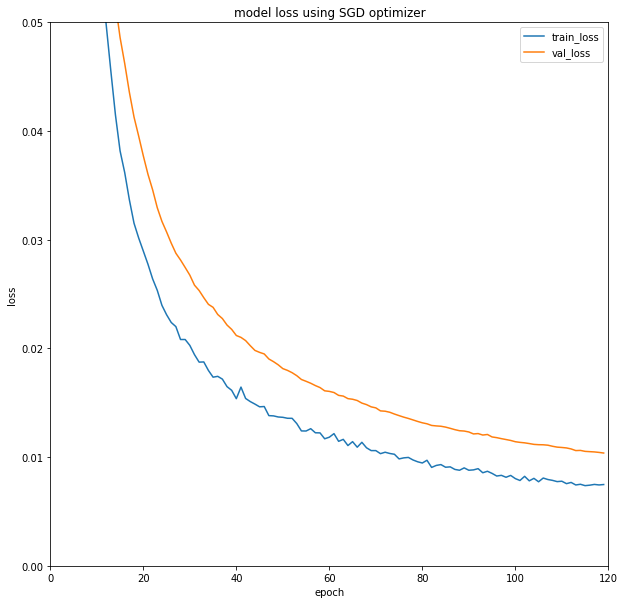

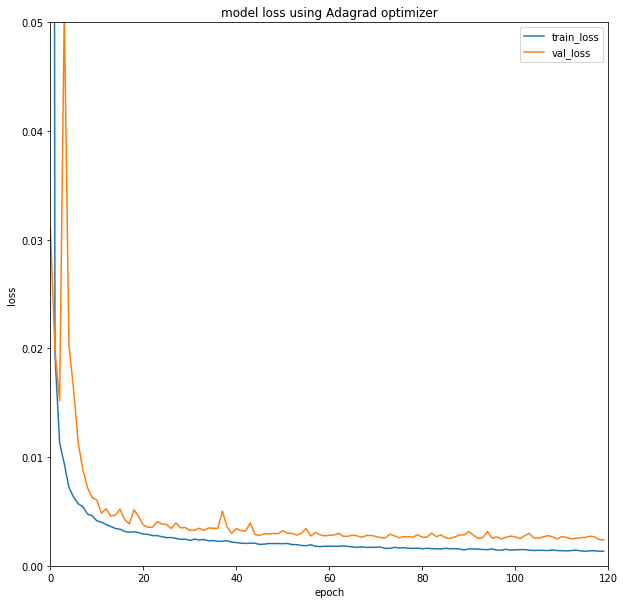

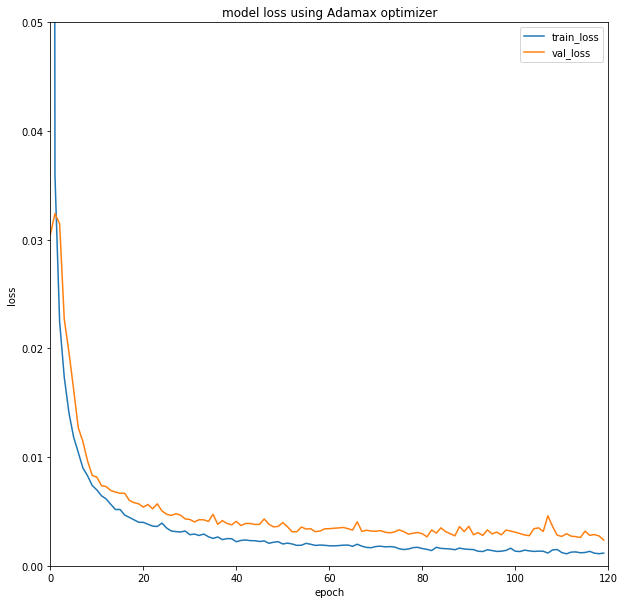

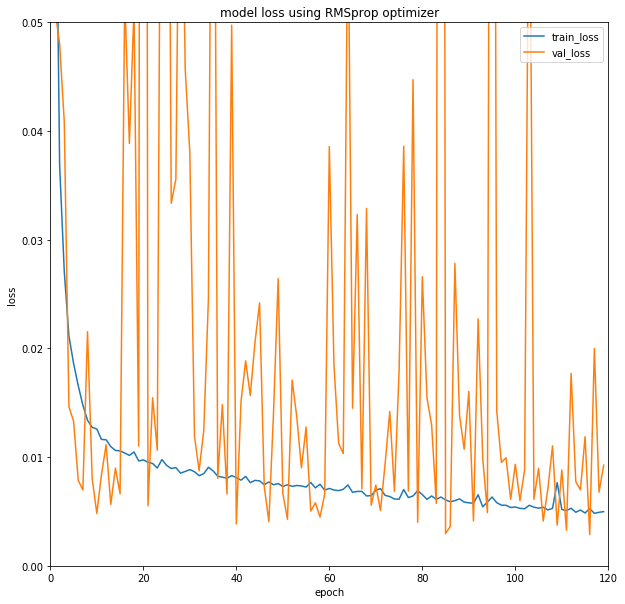

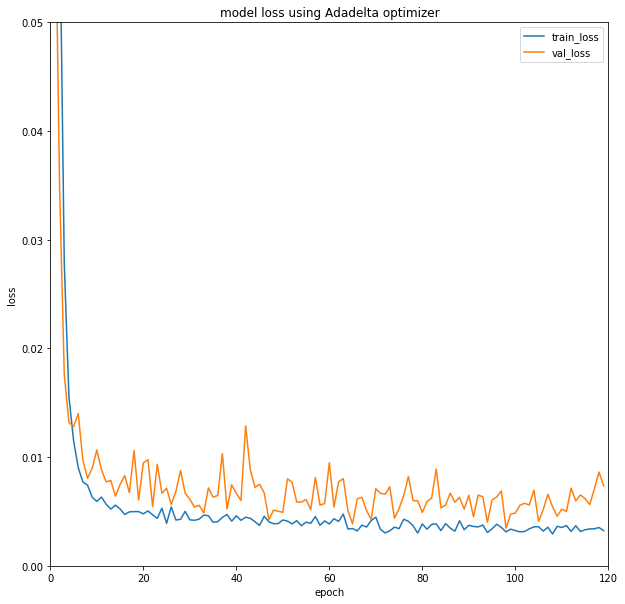

In [13]:
import matplotlib.pyplot as plt

for optimizer in optimizers.keys():
    train_loss = hist[optimizer].history['loss']
    val_loss = hist[optimizer].history['val_loss']
    model_loss_fig = plt.figure(figsize = (10,10))
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('model loss using ' + optimizer + ' optimizer')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.xlim([0,120])
    plt.ylim([0,0.05])
    plt.legend(['train_loss', 'val_loss'], loc='upper right')
    plt.show()

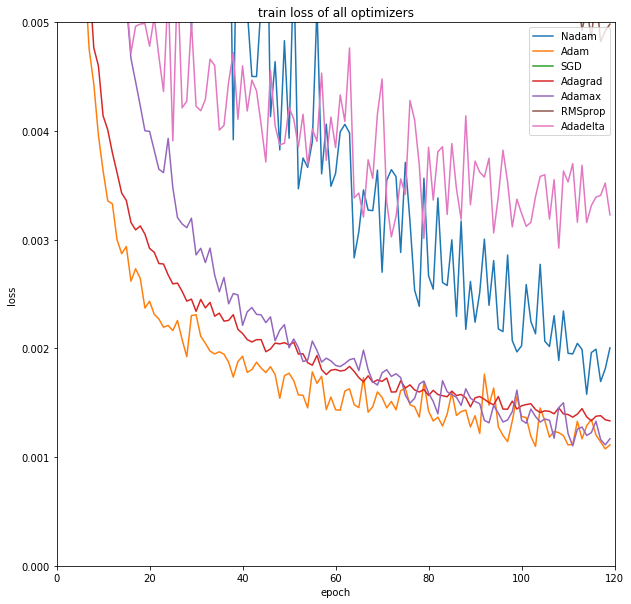

In [11]:
optimizer_names = []
model_loss_fig = plt.figure(figsize = (10,10))
for optimizer in optimizers.keys():
    plt.plot(hist[optimizer].history['loss'])
    optimizer_names.append(optimizer)

plt.title('train loss of all optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,120])
plt.ylim([0,0.005])
plt.legend(optimizer_names, loc='upper right')
plt.show()

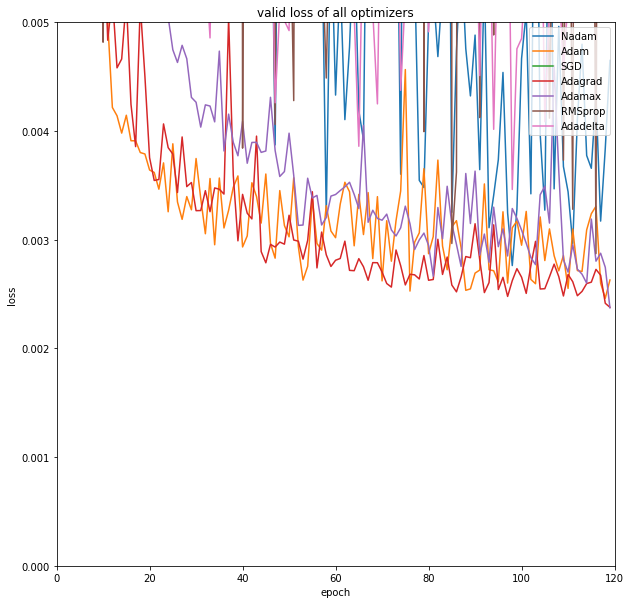

In [12]:
optimizer_names = []
model_loss_fig = plt.figure(figsize = (10,10))
for optimizer in optimizers.keys():
    plt.plot(hist[optimizer].history['val_loss'])
    optimizer_names.append(optimizer)

plt.title('valid loss of all optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,120])
plt.ylim([0,0.005])
plt.legend(optimizer_names, loc='upper right')
plt.show()